In [1]:
pip install -e .

Obtaining file:///home/natalie/nsalab/Users/naw1/desk2/dl/gym-teen
  Attempting uninstall: gym-maze
    Found existing installation: gym-maze 0.4
    Uninstalling gym-maze-0.4:
      Successfully uninstalled gym-maze-0.4
  Running setup.py develop for gym-maze
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gym
import gym_teen
import numpy as np
import time
import sys
import math
import random
import matplotlib.pyplot as plt

In [2]:
def get_explore_rate(t,min_explore_rate,decay_fact):
    return max(min_explore_rate, min(0.8, 1.0 - math.log10((t+1)/decay_fact)))


def get_learning_rate(t,min_learning_rate,decay_fact):
    return max(min_learning_rate, min(0.8, 1.0 - math.log10((t+1)/decay_fact)))

In [3]:
# variables: 
neps = 20
tstep = 200
min_explore_rate = 0.001
min_learning_rate = 0.2
#grid_size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
#decay_fact = np.prod(grid_size, dtype=float) / 10.0
decay_fact = np.prod((405,405),dtype=float)/10.0
#state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
explore_rate = get_explore_rate(0,min_explore_rate,decay_fact)
learning_rate = get_learning_rate(0,min_learning_rate,decay_fact)

In [4]:
max_t = np.prod((405,405),dtype=int)*100
streak_to_end = 100
solved_t = np.prod((405,405),dtype=int)


In [5]:
def select_action(env,state, q_table,explore_rate):
    # Select a random action
    if random.random() < explore_rate:
        action = env.action_space.sample()
    # Select the action with the highest q
    else:
        action = int(np.argmax(q_table[state]))
    return action

In [6]:
def state_to_bucket(state,env):
    grid_size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
    state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
    bucket_indice = []
    for i in range(len(state)):
        if state[i] <= state_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_bounds[i][1]:
            bucket_index = grid_size[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = state_bounds[i][1] - state_bounds[i][0]
            offset = (grid_size[i]-1)*state_bounds[i][0]/bound_width
            scaling = (grid_size[i]-1)/bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indice.append(bucket_index)
    return tuple(bucket_indice)

In [7]:
def run_qlearn(env,q_table, explore_rate, learning_rate, neps=200,tstep=100):
    env.render()
    num_streaks = 0
    discount_factor = 0.99
    max_t = np.prod((405,405),dtype=int)*100
    streak_to_end = 100
    solved_t = np.prod((405,405),dtype=int)
    decay_fact = np.prod((405,405),dtype=float)/10.0
    
    for ep in range(neps):
        if ep == 0:
            time.sleep(1)
        obv = env.reset()
        print('------------'+str(ep))
        state_0 = state_to_bucket(obv,env)
        total_reward = 0
        
        for t in range(tstep):
            # select best action and execute
            action = select_action(env,state_0, q_table, explore_rate)
            try: 
                obv,reward,done,_ = env.step(action)
            except(IndexError):
                print(action)
                print(state_0)
                break
            
            # update the state you are in, add reward (observe result)
            state = state_to_bucket(obv,env)
            total_reward += reward
            #print(reward)
            #print('cur' + str(reward))
            #print(total_reward)
            #print(reward, total_reward)
            
            # update Q-table
            best_q = np.amax(q_table[state])
            q_table[state_0 + (action,)] += learning_rate * (reward + discount_factor * (best_q) - q_table[state_0 + (action,)])
            
            # update state
            state_0 = state
            
            env.render()
            #time.sleep(0.0000001)
            
            
            # update parameters
            #explore_rate = get_explore_rate(ep,min_explore_rate,decay_fact)
            #learning_rate = get_learning_rate(ep,min_learning_rate,decay_fact)
            
            if done:
                time.sleep(1)
                print("Episode %d finished after %f time steps with total reward = %f (streak %d)."
                      % (ep, t, total_reward, num_streaks))

                plt.imshow(env.render())
                plt.show()

                if t <= solved_t:
                    num_streaks += 1
                else:
                    num_streaks = 0
                break

            elif t >= max_t - 1:
                print("Episode %d timed out at %d with total reward = %f."
                      % (ep, t, total_reward))

        # It's considered done when it's solved over 120 times consecutively
        if num_streaks > streak_to_end:
            break
            
        explore_rate = get_explore_rate(ep,0.001,decay_fact)
        learning_rate = get_learning_rate(ep,0.2,decay_fact)
                
    return q_table

In [8]:
q_table0 = np.zeros((405,405) + (4,), dtype=float)

pygame 2.1.2 (SDL 2.0.18, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
------------0
(162, 136)
Episode 0 finished after 1439.000000 time steps with total reward = -112459.623287 (streak 0).


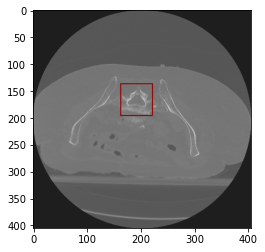

------------1
(147, 150)
Episode 1 finished after 1837.000000 time steps with total reward = -148748.175463 (streak 1).


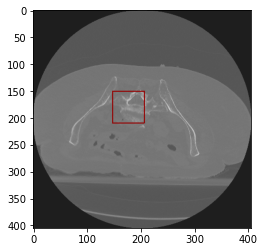

------------2
(166, 156)
Episode 2 finished after 66.000000 time steps with total reward = -3762.971519 (streak 2).


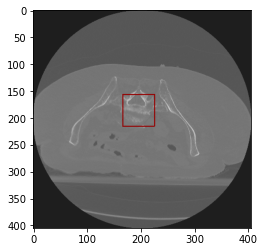

------------3
1
(0, 0)
------------4
2
(0, 0)
------------5
(173, 159)
Episode 5 finished after 93.000000 time steps with total reward = -5613.670382 (streak 3).


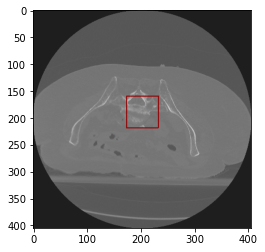

------------6
3
(0, 0)
------------7
(165, 143)
Episode 7 finished after 1164.000000 time steps with total reward = -77101.174266 (streak 4).


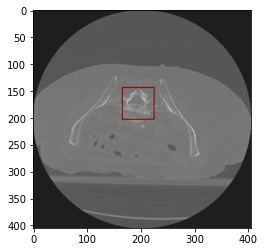

------------8
(167, 143)
Episode 8 finished after 897.000000 time steps with total reward = -69148.606906 (streak 5).


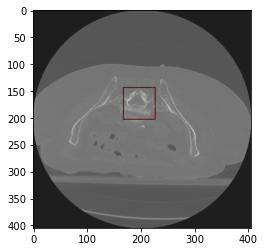

------------9
(165, 158)
Episode 9 finished after 1397.000000 time steps with total reward = -108072.099778 (streak 6).


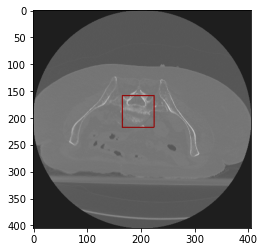

------------10


In [9]:

fin_q_table = run_qlearn(gym.make('maze-v0',height=60,width=60),q_table0,explore_rate,learning_rate,neps=100,tstep=max_t)